# Analyzing Ford GoBike Program Data 

## Investigation Overview

In this investigation, I wanted to look at the data of Ford GoBike, which could be used to predict the number of trips and the duration of all trips, and the characteristics which affect that. so we can answer this question to analyze data:
1. what is relation between duration and other characteristics
2. When are most trips taken in terms of time of day, day of the week?
3. How long does the average trip take?
4. Does the above depend on if a user is a subscriber or customer?
5. Does the above depend on if a user is a Male or Female?

## Dataset Overview
The dataset(s) provided to us by Ford contain the following fields:

 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type
 - Member Year of Birth
 - Member Gender

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [6]:
#cleaning data
#changing data type of start_time and end_time to datetime.
df["start_time"]=pd.to_datetime(df["start_time"])
df["end_time"]=pd.to_datetime(df["end_time"])
# Insert Age column
df.insert(1,"Age", 2022- df['member_birth_year'].to_numpy())
# Splitting timestamp column into separate time columns (time weekday, Start and end time hour)
df["weekday"]= df['start_time'].dt.strftime('%A')
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour
#Insert duration in minutes
df["duration_min"]=df["duration_sec"]/60
#Drooping Unuseful Columns
df.drop(columns= ['start_station_latitude', 'start_station_longitude',  'end_station_latitude','end_station_longitude'], inplace= True)
#Drop missing values
df.dropna(inplace=True)

In [7]:
#Splitting timestamp column into separate date and time columns and Month - Year, month, column
df['new_start_date'] = [d.date() for d in df['start_time']]
df['new_start_time'] = [d.time() for d in df['start_time']]
df['new_end_date'] = [d.date() for d in df['end_time']]
df['new_end_time'] = [d.time() for d in df['end_time']]
df["new_start_date"]=pd.to_datetime(df["new_start_date"])
df["new_end_date"]=pd.to_datetime(df["new_end_date"])
df['start_time'] = pd.to_datetime(df['start_time'])
df['year'], df['month'], df['day'] = df['start_time'].dt.year, df['start_time'].dt.month, df['start_time'].dt.day

In [17]:
#arranging dayweek
weekday = [ 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
#setting color palatte
color=sns.color_palette()[0]

## Males Vs. Female 
Because this dataset contains sector for gender contains male, female and other but others didn't make any sense in a real life so i decide to make it out from my data due to it didn't a significant in results so I focused on Males and Females and I've contained two visualizations below to explain how males is much more than females by 73%.

In [ ]:
# for removing others from member genders 
df=df[df.member_gender.isin(['Male', 'Female'])]

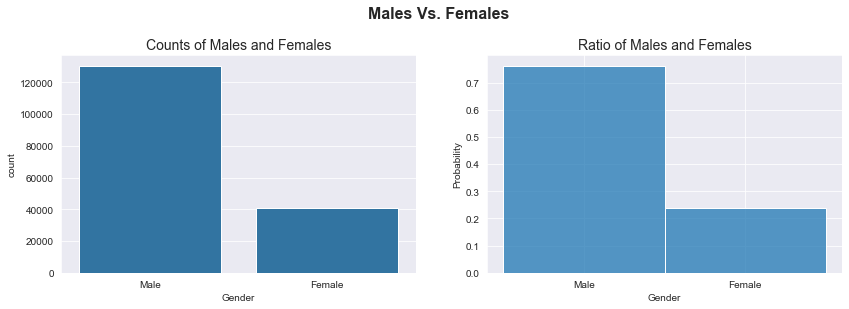

In [52]:
sns.set_style("darkgrid")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.countplot(x='member_gender', data=df, color=color,ax=ax1)
sns.histplot(x='member_gender',stat='probability', color=color,ax=ax2,data=df)
plt.suptitle('Males Vs. Females', y=1.05, fontsize=16, fontweight='bold');
ax1.set_title('Counts of Males and Females', fontsize = 14)
ax2.set_title('Ratio of Males and Females', fontsize = 14)
ax1.set_xlabel('Gender')
ax2.set_xlabel('Gender');

## Customers Vs. Subscribers 
User Type is an important characteristics in our data and other data depend on it so we must to know the numbers and percentage of customers and subscribers, In the below figures we can see that subscribers is much more than customers it represent 89.2 percent of users, whereas customers represents 10.8 percent.

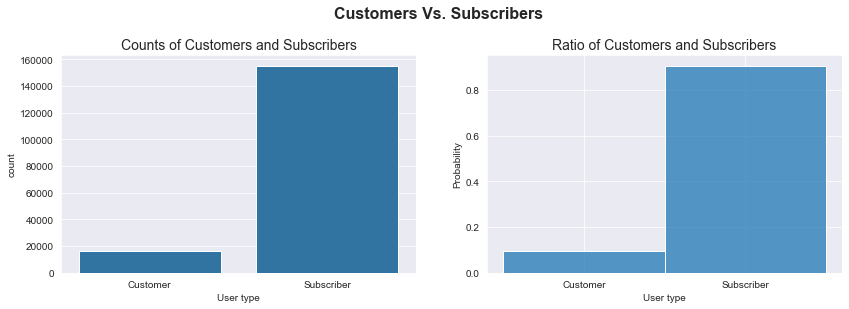

In [53]:
sns.set_style("darkgrid")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.countplot(x='user_type', data=df, color=color,ax=ax1)
sns.histplot(x='user_type',stat='probability', color=color,ax=ax2,data=df)
plt.suptitle('Customers Vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
ax1.set_title('Counts of Customers and Subscribers', fontsize = 14)
ax2.set_title('Ratio of Customers and Subscribers', fontsize = 14)
ax1.set_xlabel('User type')
ax2.set_xlabel('User type');

## The distribution of the duration for trips.
The most trips duration is smaller than 20 minutes and the peak(the most time takes) around (4 - 10) min. The average trip duration is 8.4 min .

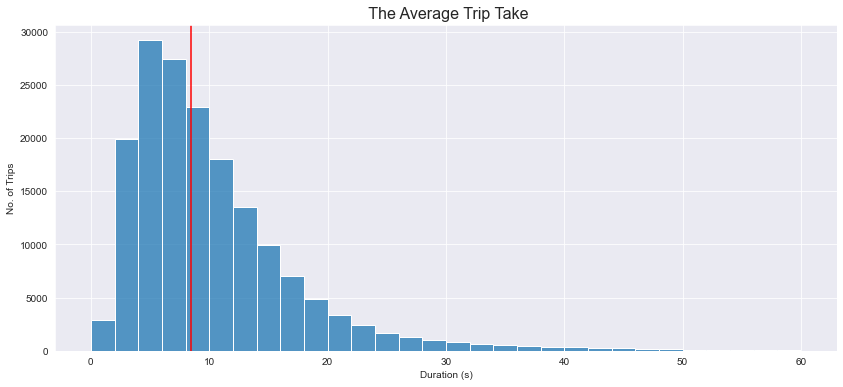

In [112]:
plt.figure(figsize=[14, 6])
sns.set_style('darkgrid')
sns.histplot(x='duration_min', binrange=(0, 60), binwidth= 2, 
             data=df, color=color)
plt.title(' The Average Trip Take', fontsize = 16)
plt.xlabel("Duration (s)")
plt.ylabel('No. of Trips')
plt.axvline(x=df.duration_min.median(), color='r');

## The distribution of the ages.
The most common users ages who had a ride between (25 - 40) years
No users less than 20 years old
Low users between (45 - 80) years

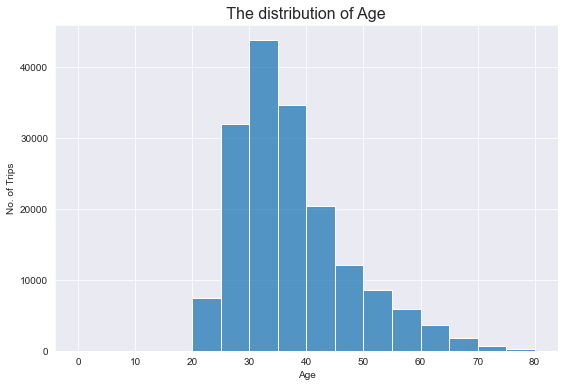

In [113]:
plt.figure(figsize=[9, 6])
sns.set_style('darkgrid')
sns.histplot(x='Age', binrange=(0, 80), binwidth=5 ,
             data=df, color=color)
plt.title(' The distribution of Age ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('No. of Trips');

## The relation between duration of ride bikes and Gender
In spite of number of males more than females but females had a longer rides than males.
average rides for male takes 500 sec.
average rides for female takes 600 sec.

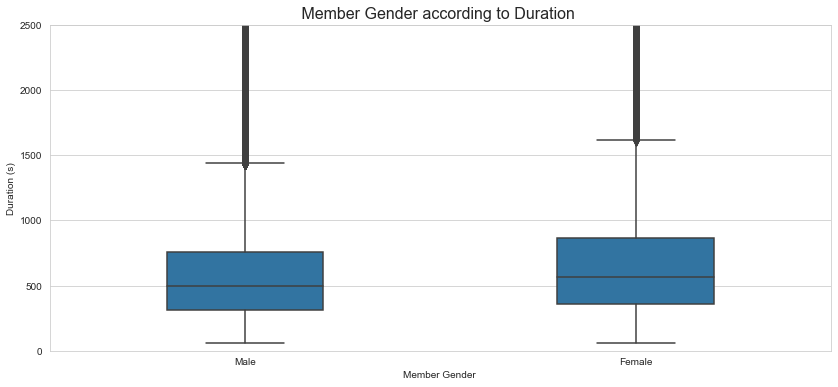

In [122]:
plt.figure(figsize=[14, 6])
sns.set_style('whitegrid')
sns.boxplot(x= 'member_gender', y="duration_sec",  width=0.4, fliersize=8 ,
                 data= df, color= color)

plt.title(' Member Gender according to Duration  ', fontsize = 16)
plt.xlabel("Member Gender ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

## The relation between duration of ride bikes and user type
Here we can see that higher percentage of customers are taking longer trips then compared to subscribers.
average rides for customer takes 750 sec.
average rides for subscriber takes 500 sec.

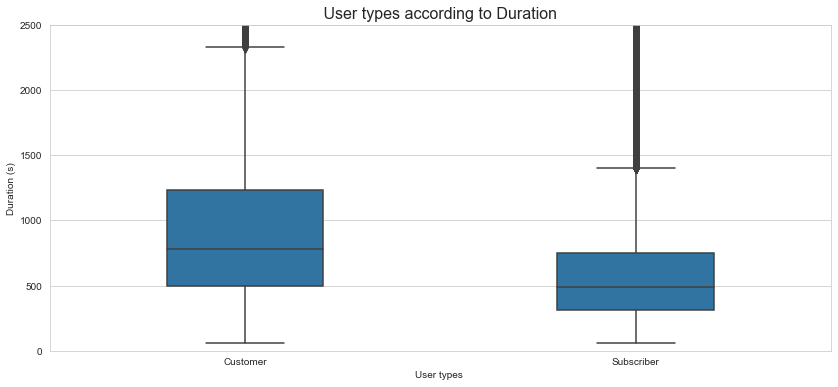

In [124]:
plt.figure(figsize=[14, 6])
sns.set_style('whitegrid')
sns.boxplot(x= 'user_type', y="duration_sec",  width=0.4, fliersize=8 ,
                 data= df, color=color)

plt.title(' User types according to Duration ', fontsize = 16)
plt.xlabel("User types ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

## The relation between Age of users and the duration of trips.

- Ages between [20:40] have a longer durations (trips) so when user was younger they have a long trips.
- when the user is older the duration of the trip decrease.

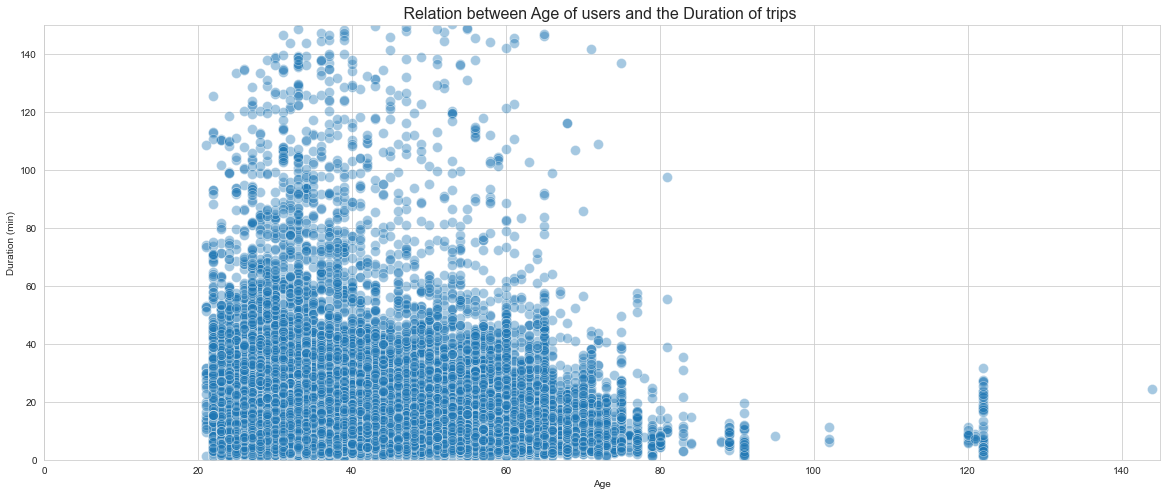

In [110]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.scatterplot(x= 'Age', y="duration_min",
                s=100,
                alpha=0.4, data= df)
plt.axis([0, 145, 0, 150])
plt.title(' Relation between Age of users and the Duration of trips  ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('Duration (min)');

## The Most station Frequently
Now, let's look to see The Most station Frequently from the top 20 most visited stations. The most stations Frequently to start are Market St and San francisco caltrian station 2

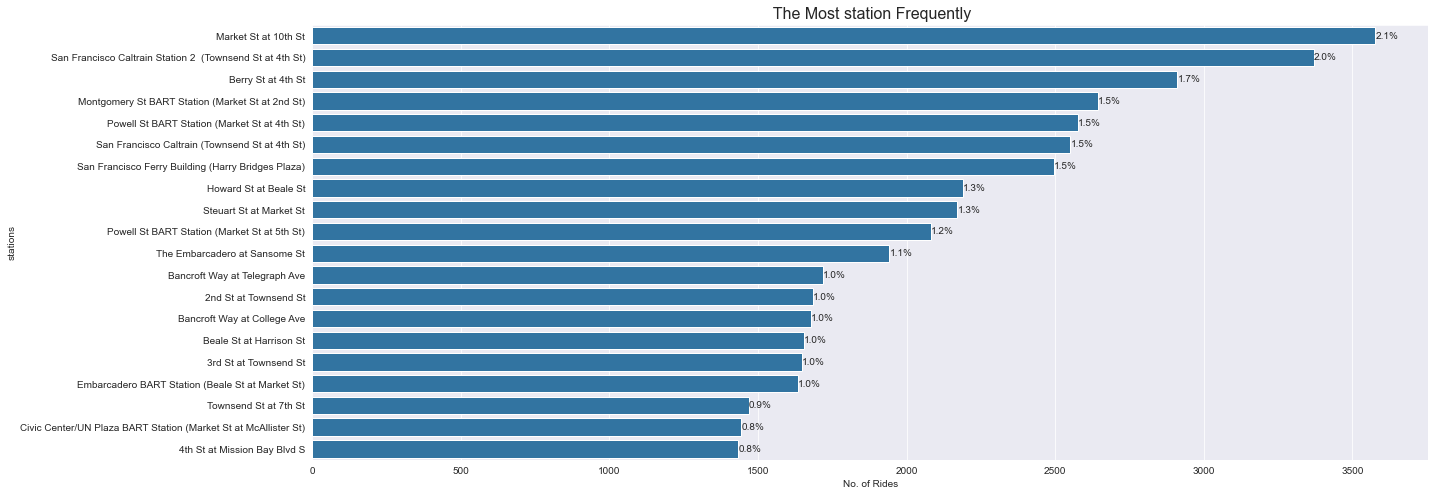

In [119]:
#to calculate to 20  station
o= df.start_station_name.value_counts().head(20).index
top10= df.start_station_name.value_counts().index[:20]
plt.figure(figsize=[20, 8])
sns.set_style('darkgrid')
sns.countplot(y='start_station_name',
             data=df, order=o, color=color)
plt.title('  The Most station Frequently ', fontsize = 16)
plt.xlabel("No. of Rides")
plt.ylabel('stations');

#percentage 
start_counts = df.start_station_name.value_counts().head(20)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

## Duration of Bike Rides from Top 10 Visited Stations
Now, let's look to see how long of bike rides were taken on average from the top 10 most visited stations. For the most part, they align pretty tightly together; however, the last station listed (San Franscisco Ferry Building) had a wider distribution of ride durations.

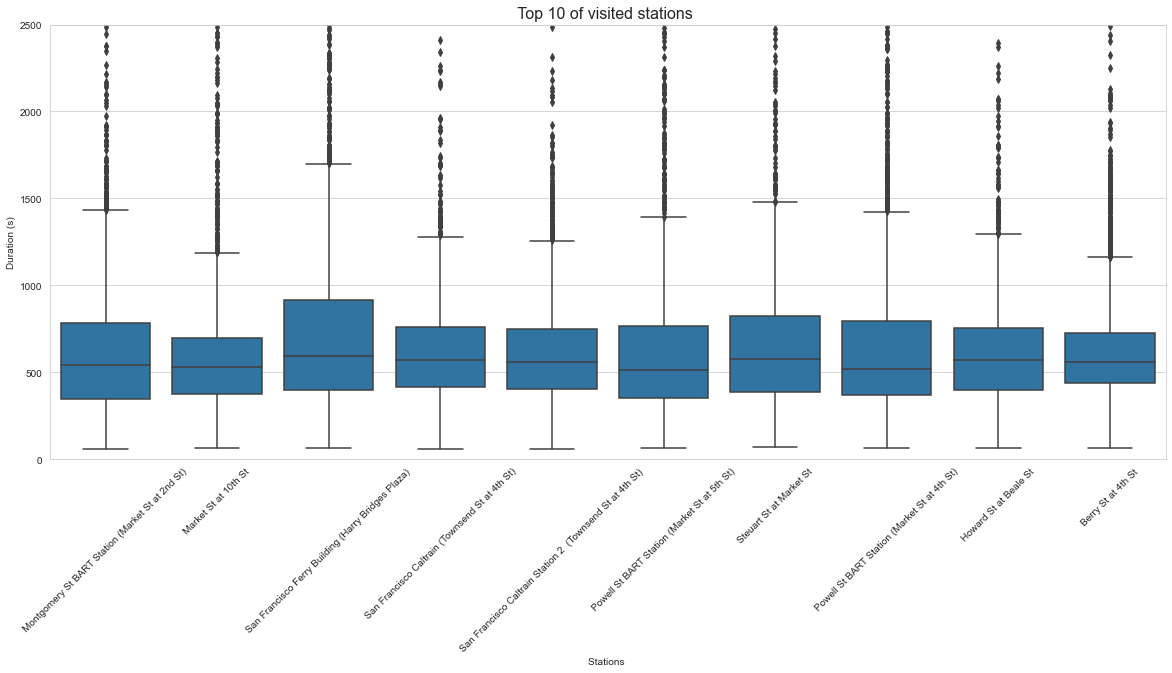

In [111]:
#to calculate to 10 station
top_10= df.start_station_name.value_counts().head(10).index
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'start_station_name', y="duration_sec",  width=0.8, fliersize=5 ,data= df[df.start_station_name.isin(top_10)], color=color)
plt.xticks(rotation = 45)
plt.title(' Top 10 of visited stations  ', fontsize = 16)
plt.xlabel("Stations ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

## The ages distribution effects on duration trips depending on Gender
- As we shown in two graphs we have high numbers of males at high ages more than woman.
- At higher ages for males take long trips more than woman.
- Here we observed that though the number of higher duration trip is higher for male but percentage is higher for women.

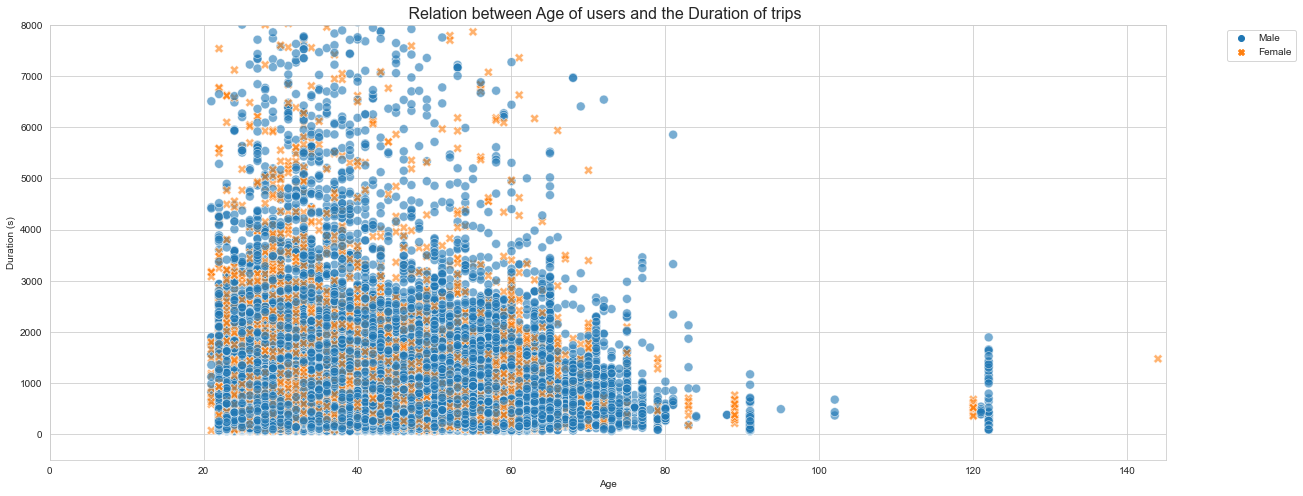

In [107]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.scatterplot(x= 'Age', y="duration_sec", style= 'member_gender', hue= 'member_gender',
                s=80,
                alpha=0.6, data= df)
plt.axis([0, 145, -500, 8000])
plt.title(' Relation between Age of users and the Duration of trips  ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('Duration (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

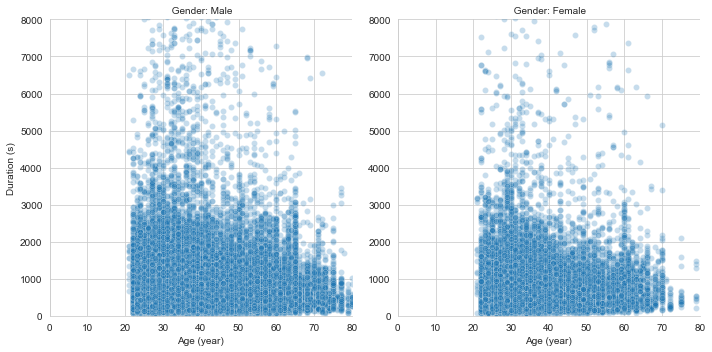

In [108]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='member_gender', height = 5, 
                 xlim = (0, 80), ylim = (0, 8000), sharey= False)
g.map(sns.scatterplot, 'Age', 'duration_sec', alpha=0.25)
g.set_axis_labels('Age (year)', 'Duration (s)')
g.set_titles(col_template=' Gender: {col_name}');

## The most trips taken in terms of time of day and day of the week
- Tuesdays and Wednesdays are the most frequently days , however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.
- The high  frequently  during the morning hours of 8-9 AM, and in the afternoon hours of 5-6 PM
- The most day have trips is thursday as we known it is weekend so it have high number of tips.
- The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm This might be related to the time for work and school

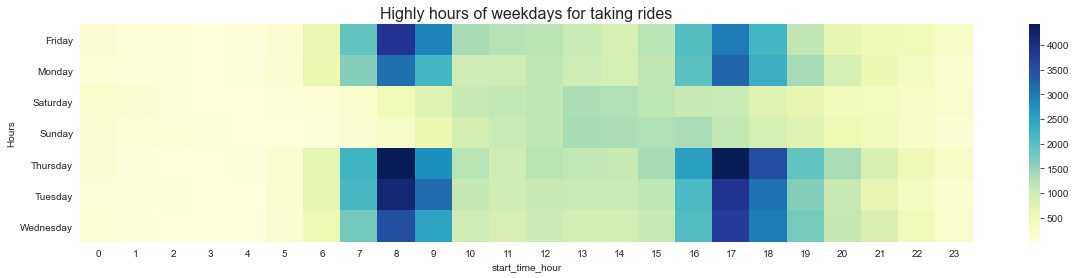

In [75]:
gg = (df.groupby('weekday').start_time_hour.value_counts().unstack().fillna(0))
plt.figure(figsize=[20, 4])
sns.set_style('darkgrid')
sns.heatmap(gg, cmap='YlGnBu')
plt.ylabel('Hours')
plt.title('Highly hours of weekdays for taking rides', fontsize=16);

## The relation between weekday and the duration of trips in the week depending on user type
- Customers have consistently longer trips than subscribers.
- the most days has long duration is saturday and sunday and less days is tuesday and wednesday

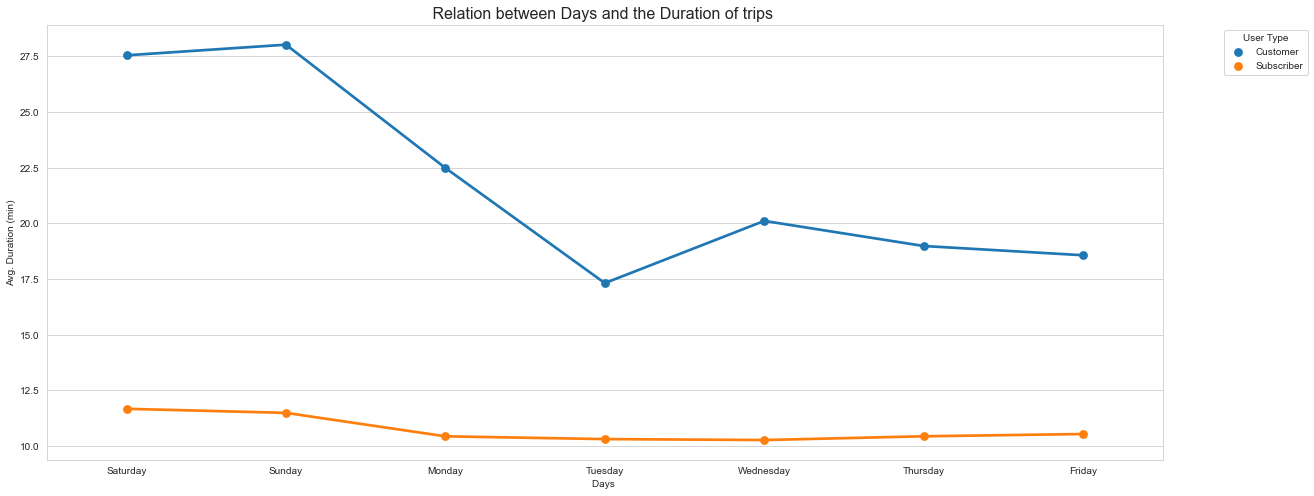

In [95]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.pointplot(x= 'weekday', y="duration_min", ci=None, order=weekday, hue=("user_type"),
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.xticks(range(0, 7, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

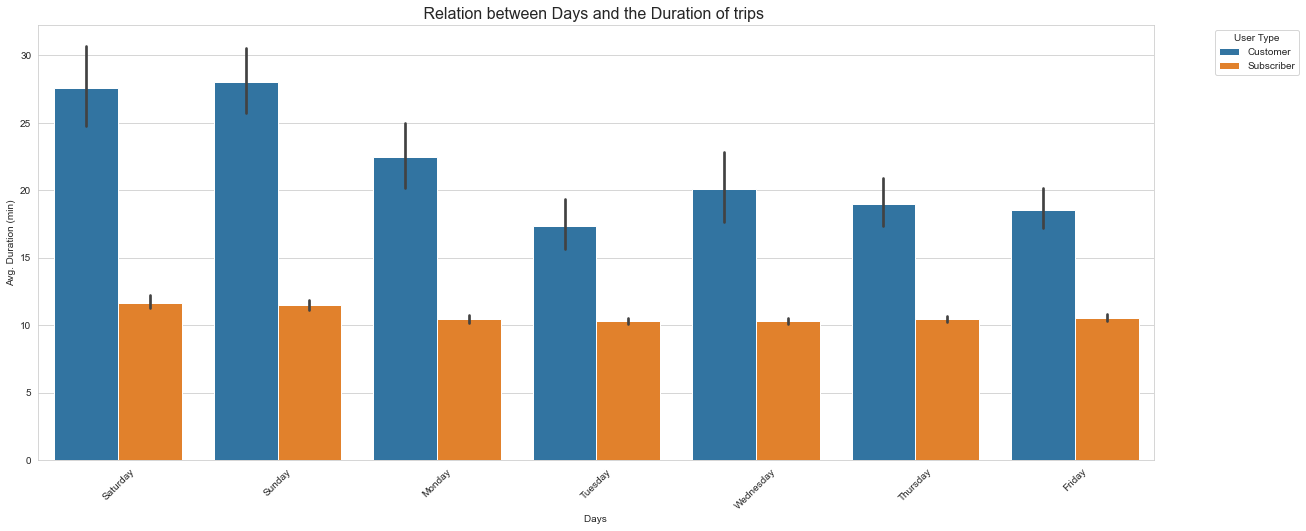

In [105]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.barplot(x= 'weekday', y="duration_min", order=weekday, estimator=np.mean , hue="user_type",
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.xticks(range(0, 7, 1))
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

## The relation between hours of day and the duration of trips in the week depending on user type 
- Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday.
- There is a clear different usage pattern between customers and subscribers in the way we previously explained.

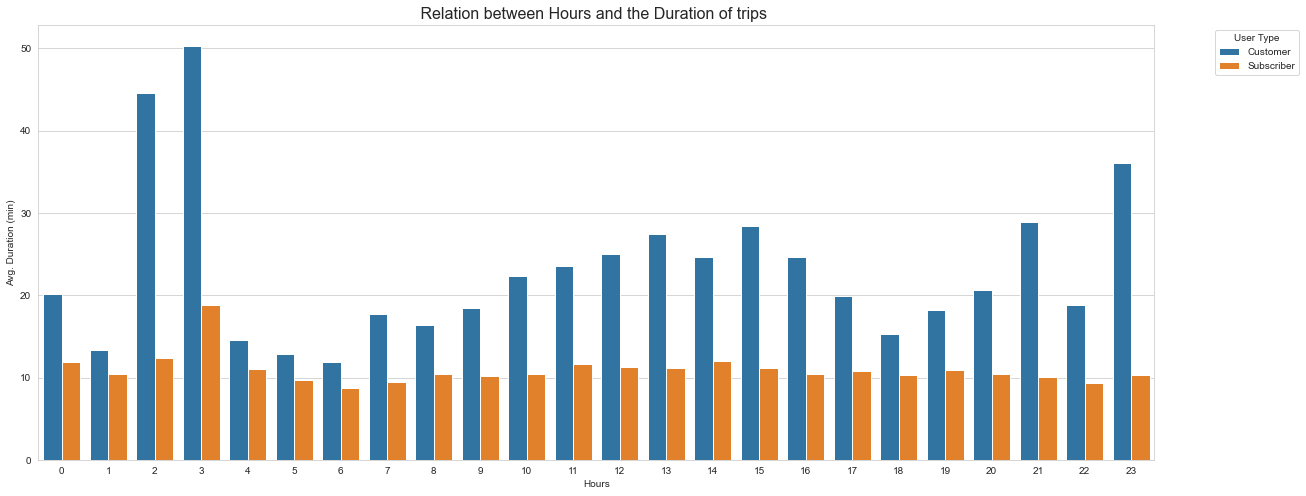

In [98]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.barplot(x= 'start_time_hour', y="duration_min",  estimator=np.mean , hue= "user_type", ci= None,
                 data= df)
plt.title(' Relation between Hours and the Duration of trips  ', fontsize = 16)
plt.xlabel("Hours")
plt.ylabel('Avg. Duration (min)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

## The most trips taken in terms of time of day and day of the week depend on user type

- There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists who use the system mainly on weekends.


In [73]:
customer = (df[df.user_type.isin(["Customer"])].groupby('weekday').start_time_hour.value_counts().unstack().fillna(0))
subsriber= (df[df.user_type.isin(["Subscriber"])].groupby('weekday').start_time_hour.value_counts().unstack().fillna(0))

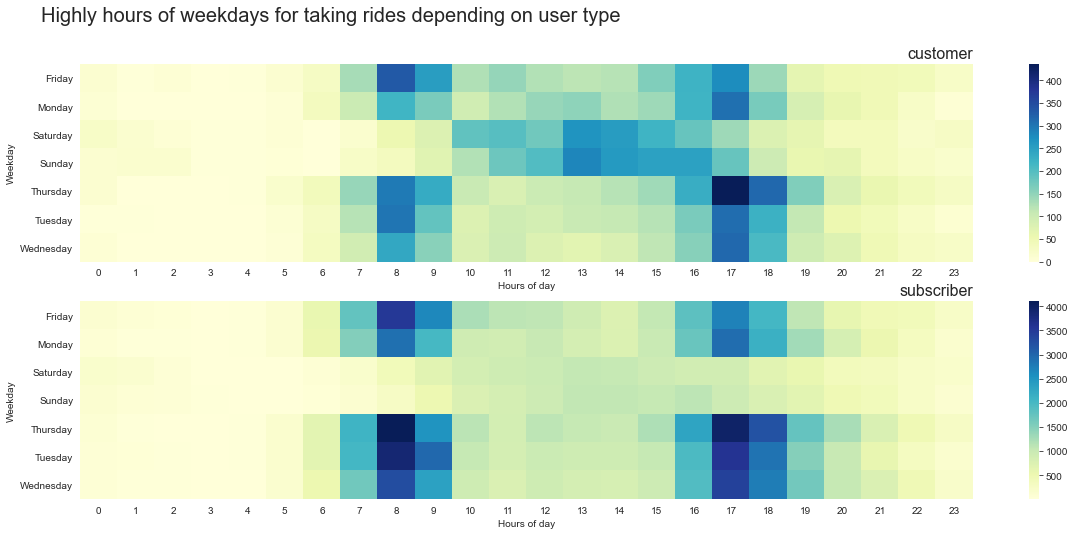

In [74]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,8))
sns.heatmap(customer, ax=ax1, cmap='YlGnBu')
sns.heatmap(subsriber, ax=ax2, cmap='YlGnBu')
ax1.set_title('customer', loc="right", fontsize = 16)
ax2.set_title('subscriber', loc="right", fontsize = 16)
ax1.set_ylabel('Weekday')
ax2.set_ylabel('Weekday')
ax1.set_xlabel('Hours of day')
ax2.set_xlabel('Hours of day')
plt.suptitle('Highly hours of weekdays for taking rides depending on user type', fontsize= 20, weight=15, ha='right');

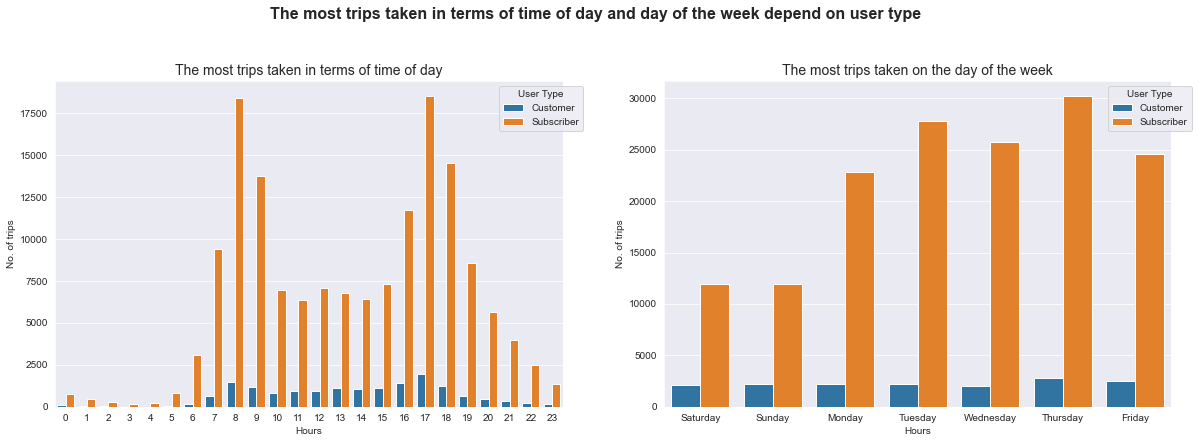

In [102]:
sns.set_style("darkgrid")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='start_time_hour', hue="user_type", data=df, ax=ax1)
sns.countplot(x='weekday', hue="user_type",data=df, order= weekday, ax=ax2)
plt.suptitle('The most trips taken in terms of time of day and day of the week depend on user type', y=1.05, fontsize=16, fontweight='bold');
ax1.set_title('The most trips taken in terms of time of day', fontsize = 14)
ax2.set_title('The most trips taken on the day of the week', fontsize = 14)
ax1.set_xlabel('Hours')
ax2.set_xlabel('Hours')
ax1.set_ylabel('No. of trips')
ax2.set_ylabel('No. of trips')
ax2.legend(bbox_to_anchor=(1.05, 1), title=("User Type"))
ax1.legend(bbox_to_anchor=(1.05, 1), title=("User Type"));

In [127]:
!jupyter nbconvert Ford Ford Gobike - Explanation.ipynb --to slides --no-input --no-prompt

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Ford' matched no files
[NbConvertApp] WARNING | pattern 'Ford' matched no files
[NbConvertApp] WARNING | pattern 'Gobike' matched no files
[NbConvertApp] WARNING | pattern '-' matched no files
[NbConvertApp] WARNING | pattern 'Explanation.ipynb' matched no files
